### Task #1: Understand the Problem Statement and Business Case
#### Business Case:
- Diabetic Retinopathy is a disease that results from complications of type 1 & 2 diabetes and affects patient eyes.
- The disease can develop if blood sugar levels are left uncontrolled for a prolonged period of time,
- It is caused by the damage of blood vessels in the retina which is located in the back of patient's eyes (retina is light sensitive tissue in the eye).
- Diabetic Retinopathy is the leading cause of blindness in the working-age population of the developed world.
- The World Health Organization estimates that 347 million people have the disease worldwide.
- With the power of Artificial Intelligence and Deep Learning, doctors will be able to detect blindness before it occurs. Aravind Eye Hospital in India hopes to detect and prevent diabetic Retinopathy among people mostly living in rural areas where medical screening and experienced doctors are limited.

|    NO DR | MILD | MODERATE | SEVERE | PROLIFERATE    |
|-----|-----|-----|-----|-----|
|  ![](train/No_DR/0a4e1a29ffff.png)   |  ![](train/Mild/0a61bddab956.png)   | ![](train/Moderate/0a9ec1e99ce4.png)    |  ![](train/Severe/0c917c372572.png)   |  ![](train/Proliferate_DR/0ada12c0e78f.png)   |

#### Inputs and Outputs
- The dataset consists of 3553 color images belongs to 5 categoriess
- Categories that are present in the data are No_DR, Mild, Moderate, Severe and Proliferative (radpily growing)

![](images/Task1-1.png)



### Task #2: Import Libraries and Datasets

In [2]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [4]:
os.listdir('./train')

['.DS_Store', 'Mild', 'Moderate', 'Proliferate_DR', 'Severe', 'No_DR']

In [19]:
# Get the list of all files and directories in specific directory
os.listdir(os.path.join('train', 'Mild'))

['2d7666b8884f.png',
 '50840c36f0b4.png',
 '30cab14951ac.png',
 'a8582e346df0.png',
 'cab3dfa7962d.png',
 '35d6c4c50072.png',
 '67f5d89da548.png',
 '6b07971c3bf6.png',
 '7116128c65ab.png',
 'e38f3a65b02b.png',
 'd85588ff2ebd.png',
 'a19ecd0a706e.png',
 '49c5e7f6b8d2.png',
 '2f2e1949ad56.png',
 '35aa7f5c2ec0.png',
 '55eac26bd383.png',
 'af133a85ea0c.png',
 '80a02014b418.png',
 '384631079d1e.png',
 'e25ccfe38e44.png',
 '6ea07d19b4ce.png',
 '8273fdb4405e.png',
 'ead23cc922ed.png',
 '1e8a1fdee5b9.png',
 'c102db7634d8.png',
 '1b329a127307.png',
 '0f495d87656a.png',
 '58184d6fd087.png',
 '25e9fd872182.png',
 'c4a8f2fcf6e8.png',
 'ee78ce914066.png',
 'e9ff9352ccb3.png',
 'cb2f3c5d71a7.png',
 '5090917a2676.png',
 '79ce83c07588.png',
 'dbd062558b81.png',
 '5671eb95512b.png',
 '00cb6555d108.png',
 '96a9706b8534.png',
 'ea15a290eb96.png',
 '36677b70b1ef.png',
 'eba3acc42197.png',
 'f481f76a6b75.png',
 'f6f7dba7104d.png',
 '821789e9053f.png',
 'a75bab2463d4.png',
 '6028a575dc27.png',
 'a47432cd41e

In [26]:
#check the number of images in the dataset
train = []
label = []

# os.listdir returns the list of files in the folder, in this case class name
for i in os.listdir('./train'):
    train_class = os.listdir(os.path.join('train',i))
    for j in train_class:
        img = os.path.join('train',i,j)
        train.append(img)
        label.append(i)

print ('Number of train images = {}'.format(len(train)))


Number of train images = 3662


In [ ]:
#Remove '.DS_Store' file if error encountered
#!cd train find . -name '.DS_Store' -type f -delete

In [27]:
train

['train/Mild/2d7666b8884f.png',
 'train/Mild/50840c36f0b4.png',
 'train/Mild/30cab14951ac.png',
 'train/Mild/a8582e346df0.png',
 'train/Mild/cab3dfa7962d.png',
 'train/Mild/35d6c4c50072.png',
 'train/Mild/67f5d89da548.png',
 'train/Mild/6b07971c3bf6.png',
 'train/Mild/7116128c65ab.png',
 'train/Mild/e38f3a65b02b.png',
 'train/Mild/d85588ff2ebd.png',
 'train/Mild/a19ecd0a706e.png',
 'train/Mild/49c5e7f6b8d2.png',
 'train/Mild/2f2e1949ad56.png',
 'train/Mild/35aa7f5c2ec0.png',
 'train/Mild/55eac26bd383.png',
 'train/Mild/af133a85ea0c.png',
 'train/Mild/80a02014b418.png',
 'train/Mild/384631079d1e.png',
 'train/Mild/e25ccfe38e44.png',
 'train/Mild/6ea07d19b4ce.png',
 'train/Mild/8273fdb4405e.png',
 'train/Mild/ead23cc922ed.png',
 'train/Mild/1e8a1fdee5b9.png',
 'train/Mild/c102db7634d8.png',
 'train/Mild/1b329a127307.png',
 'train/Mild/0f495d87656a.png',
 'train/Mild/58184d6fd087.png',
 'train/Mild/25e9fd872182.png',
 'train/Mild/c4a8f2fcf6e8.png',
 'train/Mild/ee78ce914066.png',
 'train/

In [28]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

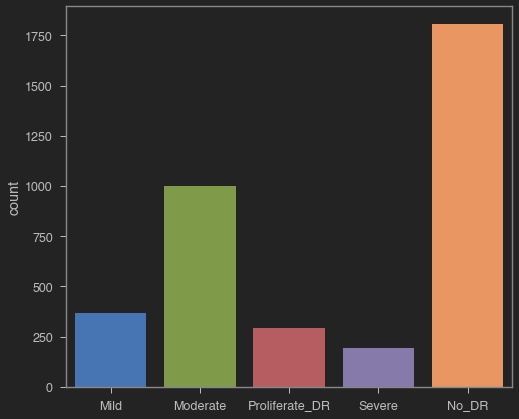

In [29]:
#Count plot for all classes
sns.countplot(label)


### Task #3: Perform Data Exploration and Visualization

### Task #4: Perform Data Augmentation and Create Data Generator

### Task #5: Understand the Theory and Intuition Behind Convolutional Neural Networks

### Task #6: Build a ResNet Deep Neural Network Model

### Task #7: Compile and Train the Deep Neural Network Model

### Task #8: Assess the Performance of the Trained Model